In [1]:
import numpy as np
import  pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../')

import numpy as np
import gc
import os
import sys
import cv2
import itertools
from PIL import Image

import random

from tqdm import tqdm


# Compare RMSE
---

In [2]:
path1="../output/analysis/cyclegan_pytorch/rmse_cossim_data.pkl"
path2="../output/analysis/cyclegan_unpaired_ver5.1.0/rmse_cossim_data.pkl"
df1=pd.read_pickle(path1)
df2=pd.read_pickle(path2)

In [3]:
display(df1.head())
display(df2.head())

,rmse,cos_sim
0,9.832439,6.041906e-07
1,10.054906,1.445894e-07
2,10.713998,2.414107e-07
3,9.686613,1.516580e-07
4,8.852330,1.951554e-07


,rmse,cos_sim
0,9.505453,2.811818e-08
1,9.250709,4.578491e-07
2,9.270705,2.957333e-07
3,9.383775,5.014757e-07
4,8.797165,1.069956e-08


In [4]:
df1.describe()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,10.226137,5.663436e-07
std,0.646887,4.593955e-07
min,7.646012,0.000000e+00
25%,9.949977,1.940727e-07
50%,10.296755,5.007019e-07
75%,10.631160,7.916328e-07
max,11.489900,2.167189e-06


In [5]:
df2.describe()
# df2.rmse.median()

,rmse,cos_sim
count,100.000000,1.000000e+02
mean,8.385548,1.002734e-06
std,1.419579,8.469986e-07
min,4.782228,0.000000e+00
25%,7.548265,2.631410e-07
50%,8.759600,7.321454e-07
75%,9.439568,1.743826e-06
max,10.748486,3.282995e-06


{'whiskers': [<matplotlib.lines.Line2D at 0x1ee4692a6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ee4692ac50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ee4692a390>,
 'medians': [<matplotlib.lines.Line2D at 0x1ee4693a240>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ee4693a7f0>,
 'means': [<matplotlib.lines.Line2D at 0x1ee4693a518>,
  <matplotlib.lines.Line2D at 0x1ee46949c18>]}

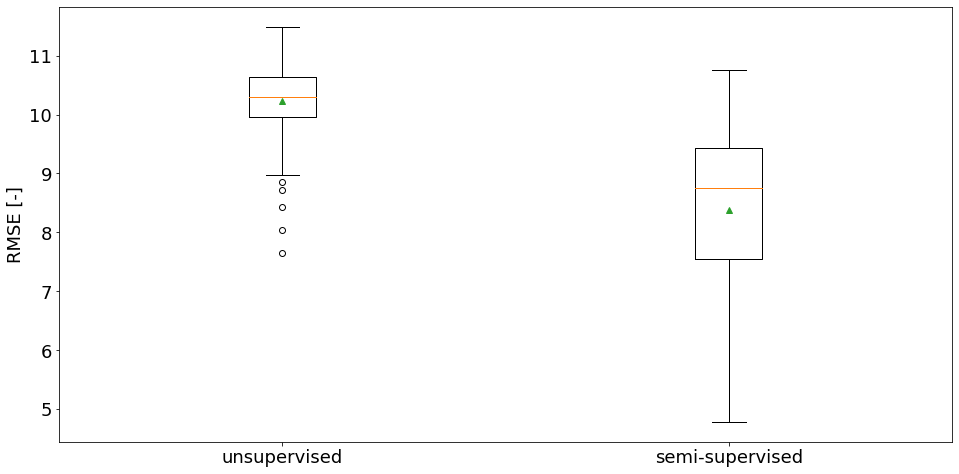

In [10]:
plt.figure(figsize=(16,8))
plt.rcParams["font.size"] = 18
plt.ylabel("RMSE [-]")
plt.boxplot([df1.rmse,df2.rmse],labels=["unsupervised","semi-supervised"],showmeans=True)

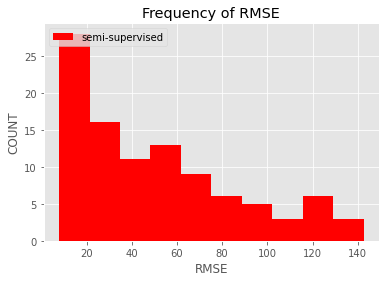

In [10]:
plt.hist(df2.rmse,bins=10, histtype='stepfilled',label="semi-supervised", color='r')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

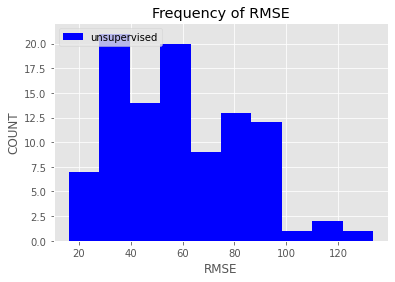

In [11]:
plt.hist(df1.rmse,bins=10, histtype='stepfilled',label="unsupervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

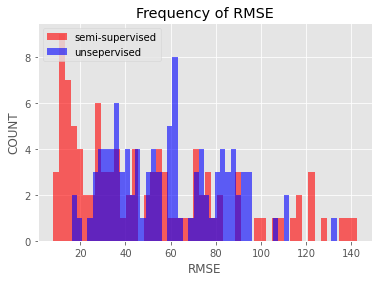

In [12]:
plt.hist(df2.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="semi-supervised", color='r')
plt.hist(df1.rmse,bins=50, histtype='stepfilled', alpha=0.6,label="unsepervised", color='b')
plt.xlabel("RMSE")
plt.ylabel("COUNT")
plt.title("Frequency of RMSE")
plt.legend(loc="upper left")

# Compare Image
---

In [13]:
def get_images(folder,num=100):
    fake_path=os.listdir(folder+"fake")
    depth_path=os.listdir(folder+"depth")
    color_path=os.listdir(folder+"color")
    images={"fake":[],"depth":[],"color":[]}
    for i in range(num):
        fake=cv2.imread(f"{folder}fake/{fake_path[i]}",0)
        depth=cv2.imread(f"{folder}depth/{depth_path[i]}",0)
        color=cv2.imread(f"{folder}color/{color_path[i]}")
        images["fake"].append(fake)
        images["depth"].append(depth)
        images["color"].append(color)
    return images

In [14]:
im_path1="../output/analysis/cyclegan_pytorch/"
im_path2="../output/analysis/cyclegan_unpaired_ver5.1.0/"

im_semi=get_images(im_path2)
im_un=get_images(im_path1)

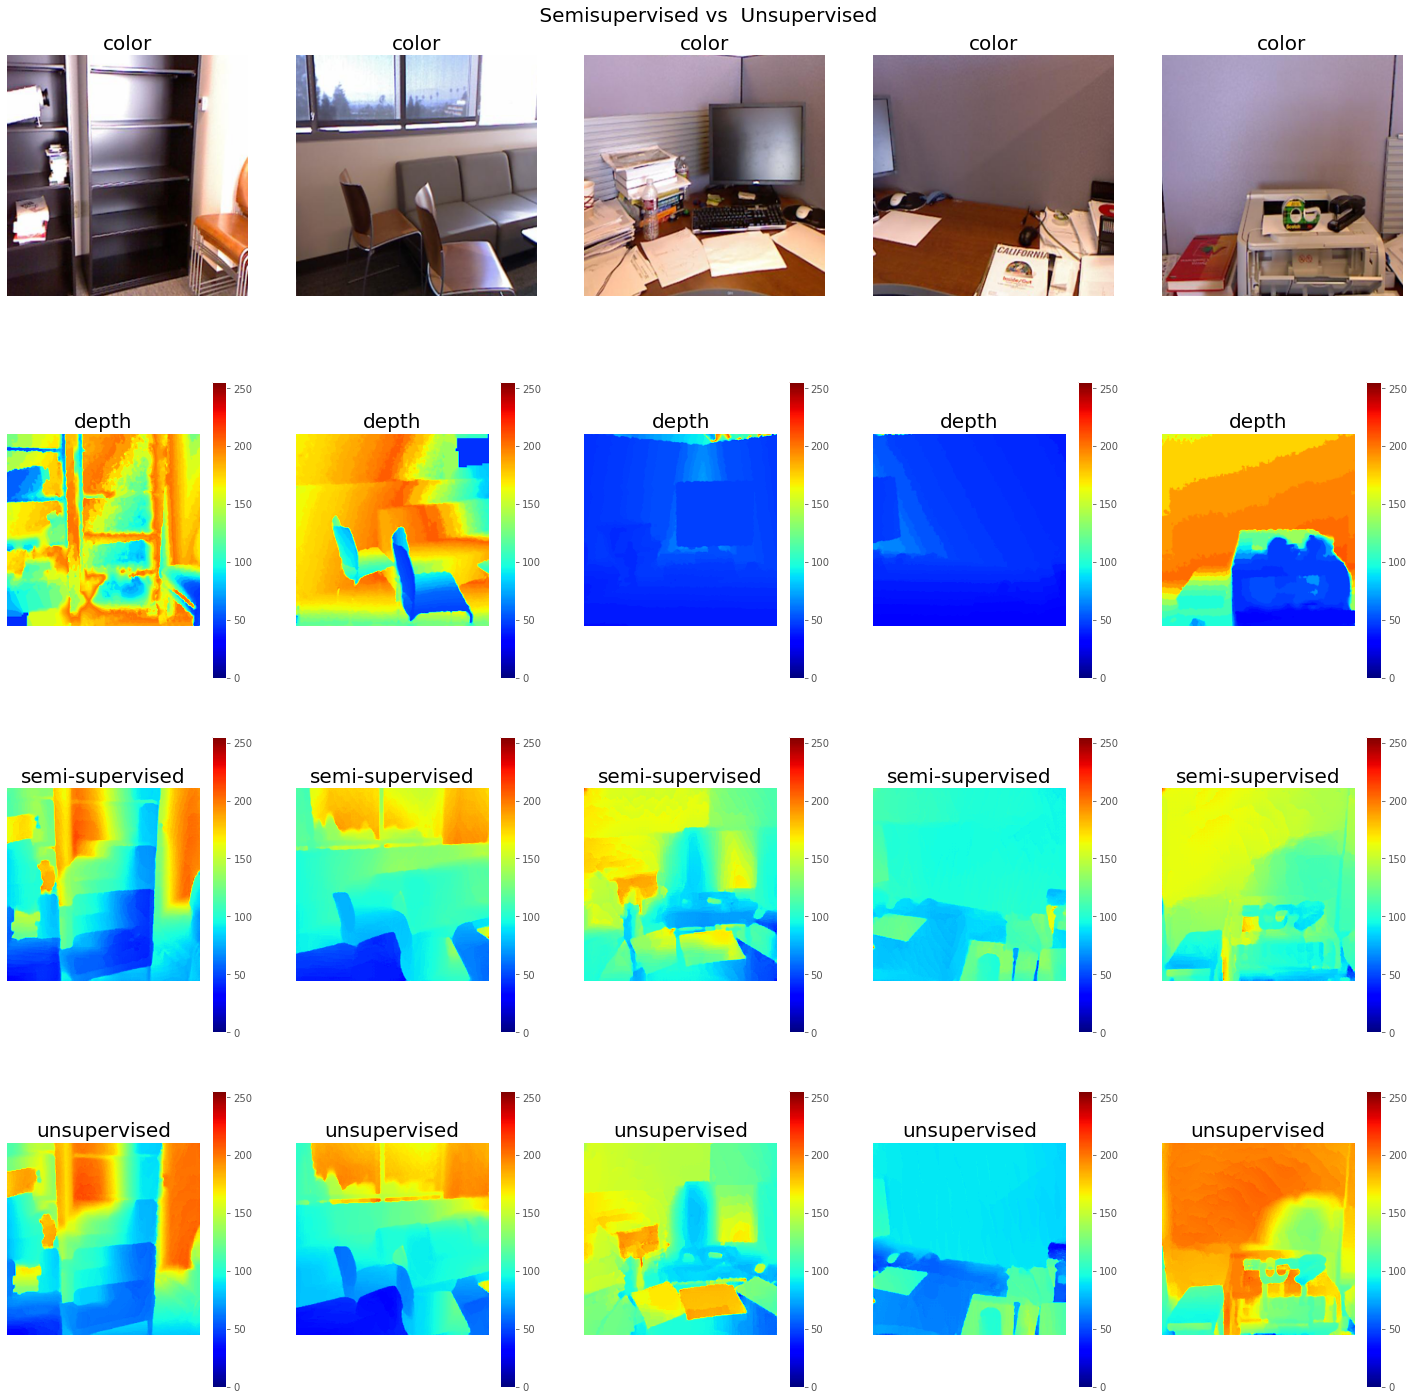

In [15]:
fig=plt.figure(figsize=(25,25))
plt.title(" Semisupervised vs  Unsupervised",fontsize=20)
plt.axis("off")

for i in range(5):

    ax=fig.add_subplot(4,5,i+1)
    ax.set_title("color",fontsize=20)
    ax.imshow(im_semi["color"][i])
    ax.axis("off")

    ax=fig.add_subplot(4,5,i+1+5)
    ax.set_title("depth",fontsize=20)
    a=ax.imshow(im_semi["depth"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5)
    ax.set_title("semi-supervised",fontsize=20)
    a=ax.imshow(im_semi["fake"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)

    ax=fig.add_subplot(4,5,i+1+5+5+5)
    ax.set_title("unsupervised",fontsize=20)
    a=ax.imshow(im_un["fake"][i],cmap="jet", vmin = 0, vmax =255)
    ax.axis("off")
    fig.colorbar(a, ax=ax)
    